<a href="https://colab.research.google.com/github/noobylub/final_coursework/blob/main/coursework_data_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment**
<br>
This research seeks to compare One-Hot-Encoding against Multi-Layer Perceptron, which has be de-facto for many ML problems. 
<br>
The following experiement will be performed and evaluated: 

*   One hot encoding (OHE), sigmoid
*   Multi Layer Perceptron (MLP), sigmoid
*   OHE, softmax  
*   MLP, softmax



**Retrieving the Data and Data Analysis**

In [1]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

zsh:1: command not found: wget


In [22]:
# Run this when editing in code editor 
!curl -O https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.2M  100 21.2M    0     0  4455k      0  0:00:04  0:00:04 --:--:-- 4526k


In [ ]:
# Example of what the data looks like
!head -n5 Compiled_Reviews.txt

REVIEW	RATING	PRODUCT_TYPE	HELPFUL
"This is a wonderful album, that evokes memories of the 60's folk boom, yet contains original songs. I was amazed at the fantastic harmonies and musical arrangements.Anyone who loves the movie ""A Mighty Wind"" and who loves folk music will fall in love with this album. I know I did"	positive	music	neutral
"On one hand, this CD is a straight ahead instrumental rocker, but Johnny A really shows how great he is with ballads, such as his covers of ""Wichita Lineman,"" and ""Yes it Is.""  In fact, those two ballads alone are worth the price of the CD by themselves.But Johnny A can flat kick your ass, too.  He's a biker and his tunes like Oh Yeah, In the Wind and Two Wheel Horse are named for his other hobby.  And they rock, but there's nothing cliched or tired in his style.  He always seems to be looking for new ways to say something.I saw him in person at the Triple Door in Seattle sometime in February 2005 in a power trio format and he played most of th

**Data loading and pre-processing**
<br>
Below we preprocess the data from the raw file "Compiled_reviews.txt"
<br>
We remove any unwanted characters, to improve the integrity of the text corpus. 

In [74]:
import re
import numpy as np
import matplotlib.pyplot as plt

reviews=[]
sentiment_ratings=[]
product_types=[]
helpfulness_ratings=[]

with open("Compiled_Reviews.txt") as f:
   for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        # remove punctuation/numbers and replace it with a space
        fields[0] = re.sub(r'[.,!?;:()\[\]{}\-—\'\/\"\"\d+]', " ",fields[0])
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        product_types.append(fields[2])
        helpfulness_ratings.append(fields[3])


**Data Analysis**
<br/>
Below we see what the data looks like after pre-processing
<br/>
Data analysis can also be shown below

In [4]:
index = 0
import re
for index in range(len(reviews)):
  print("Review is ",reviews[index])
  print("Sentiment ", sentiment_ratings[index])
  print("Helpfullness is ", helpfulness_ratings[index])
  print("-----------")
  if(index >5):
    break;
# helpfulness_ratings[0:5]

Review is   This is a wonderful album  that evokes memories of the    s folk boom  yet contains original songs  I was amazed at the fantastic harmonies and musical arrangements Anyone who loves the movie   A Mighty Wind   and who loves folk music will fall in love with this album  I know I did 
Sentiment  positive
Helpfullness is  neutral
-----------
Review is   On one hand  this CD is a straight ahead instrumental rocker  but Johnny A really shows how great he is with ballads  such as his covers of   Wichita Lineman    and   Yes it Is     In fact  those two ballads alone are worth the price of the CD by themselves But Johnny A can flat kick your ass  too   He s a biker and his tunes like Oh Yeah  In the Wind and Two Wheel Horse are named for his other hobby   And they rock  but there s nothing cliched or tired in his style   He always seems to be looking for new ways to say something I saw him in person at the Triple Door in Seattle sometime in February      in a power trio format and

Class neutral: 10321 (28.24%)
Class helpful: 20351 (55.68%)
Class unhelpful: 5876 (16.08%)


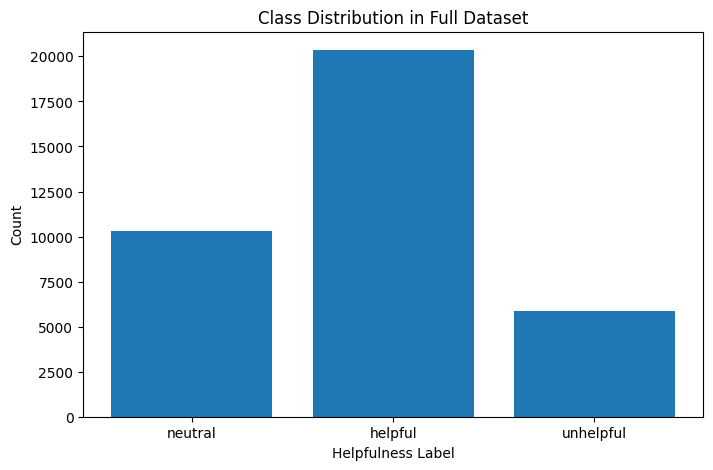

In [76]:
# Class Distribution Analysis 
class_distribution = Counter(helpfulness_ratings)
total_data = len(helpfulness_ratings)


for rating, count in class_distribution.items():
    percentage = (count / total_data) * 100
    print(f"Class {rating}: {count} ({percentage:.2f}%)")


plt.figure(figsize=(8, 5))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Helpfulness Label')
plt.ylabel('Count')
plt.title('Class Distribution in Full Dataset')
plt.show()

**Tokenising Corpus Dataset**
<br/>
Tokenising the words all the words in the reviews database. This will then be used to create the list of features, which would be the columns

In [4]:
import re
from collections import Counter
# Tokenising it by spaces
tokenised_set = []
for review in reviews:
  # Basically, re.split(' ') results in an array of words split by spaces
  # Then iterate through that array of words and append it individually to tokenised_set
  [tokenised_set.append(tokens) for tokens in re.split(' ', review)]

counts = Counter(tokenised_set)
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
so=list(zip(*so))[0]


In [78]:
so[:50]

('',
 'the',
 'I',
 'and',
 'to',
 'a',
 'it',
 'of',
 'is',
 'this',
 'in',
 'for',
 'that',
 'you',
 'with',
 'on',
 's',
 'have',
 'was',
 'The',
 'my',
 'not',
 't',
 'but',
 'are',
 'as',
 'be',
 'It',
 'one',
 'so',
 'or',
 'can',
 'they',
 'all',
 'at',
 'like',
 'This',
 'very',
 'from',
 'just',
 'out',
 'would',
 'has',
 'an',
 'up',
 'about',
 'had',
 'more',
 'your',
 'get')

In [ ]:
# We want to focus on content words


**Experiments with One Hot Encoders for Sentiment Analysis**
<br>
This google collab will experiemnt the effect of the amount of features, and the data split, and note their impact on different task for the helpfullness and sentiment analysis





Experiment for 8000 features, meaning 8000 words
<br>
Below is the code for one-hot encoder.

In [5]:
import numpy as np
# 5000 Features
word_list = so[0:8000]
M = np.zeros((len(reviews), len(word_list)))
#iterate over the reviews
for i, rev in enumerate(reviews):
  for(j,word) in enumerate(word_list):
    if word in rev:
      M[i,j]=1

In [6]:
M.shape

(36548, 8000)

In [9]:
M[:5]

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [8]:
# Splitting, this data will be split with 60/20/20 split
train_ints=np.random.choice(len(reviews),int(len(reviews)*0.6),replace=False)
test_train_ints = list(set(range(0,len(reviews))) - set(train_ints))
test_ints = np.random.choice(len(test_train_ints),int(len(test_train_ints)*0.5), replace=False)
final_test_ints = list(set(range(0,len(test_train_ints))) - set(test_ints))

In [ ]:
len(reviews)

36548

In [9]:
print("Training test", len(train_ints))
print("Validation test", len(test_ints))
print("Final test", len(final_test_ints))
print("Total", len(train_ints)+len(test_ints)+len(final_test_ints))

Training test 21928
Validation test 7310
Final test 7310
Total 36548


In [10]:
# Divide the features by the training indices
# Select all rows that are in the indices of the respective lists and select all the rows
M_train = M[train_ints,]
M_test = M[test_ints,]
M_final_test = M[final_test_ints,]
sentiment_labels = [sentiment_ratings[i] for i in train_ints]
sentiment_labels_test = [sentiment_ratings[i] for i in test_ints]
sentiment_labels_final_test = [sentiment_ratings[i] for i in final_test_ints]

In [17]:
print(M_test.shape)
print(M_train.shape)
print(M_final_test.shape)
print(len(sentiment_labels))
print(len(sentiment_labels_test))
print(len(sentiment_labels_final_test))

(7310, 8000)
(21928, 8000)
(7310, 8000)
21928
7310
7310


In [1]:

weights = np.random.rand(5000)
print(weights.shape)



NameError: name 'np' is not defined

Text(0, 0.5, 'loss')

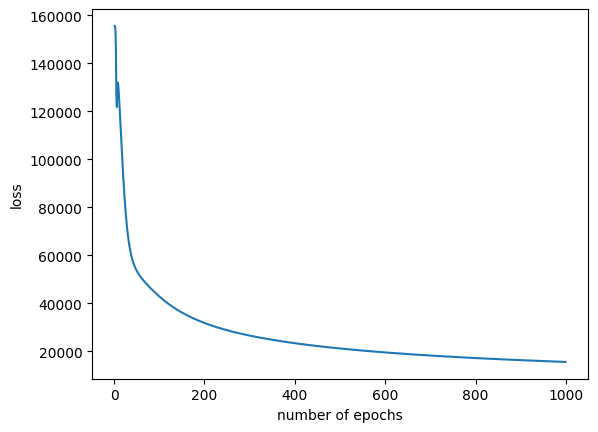

In [ ]:
# Training
import math
import matplotlib.pyplot as plt

num_features=8000
y=[int(l == "positive") for l in sentiment_labels]
weights = np.random.rand(num_features)
bias=np.random.rand(1)
n_iters = 1000
lr=0.4
logistic_loss=[]
num_samples=len(y)
for i in range(n_iters):
  # Basically you are multiplying all the values of M_train with the weights
  # It would be similar to this: z= bias + (x[0]*weights[0] + x[1]*weights[1])
  # The values here would be 21928, 5000 and 5000, 1, leading to a matrix of 21928, 1
  z= M_train.dot(weights) + bias
  # print(z)
  # (1 / (1+np.exp(-z))) we use sigmoid because we only need to know whether it is positive or negative, two possible values
  q = (1 / (1+np.exp(-z)))
  # print(q)
  eps=0.00001
  loss = -sum((y*np.log2(q+eps)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q+eps)))
  logistic_loss.append(loss)
  # We then make the prediction, if it is below a certain number, 0.5 it is negative and vice versa
  y_pred=[int(ql > 0.5) for ql in q]

  # For logistic regression one shot encoder= dw1 = np.dot(x[0],q-y)/num_samples
  # dw1 = np.do(x[0], q-y)/num_samples

  dw = (q-y).dot(M_train)/num_samples
  db = sum(q-y)/num_samples
  weights = weights - dw*lr
  bias = bias - db*lr

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [ ]:
z= M_final_test.dot(weights) + bias
q = (1 / (1+np.exp(-z)))
y_test_pred=[int(ql > 0.5) for ql in q]

**Result for One Hot Encoding**
<br>
1.  Features: 5000
2.  Binary classification




In [ ]:
# y_test=[int(l == "positive") for l in sentiment_labels_test]
# acc_test=[int(yp == y_test[s]) for s,yp in enumerate(y_test_pred)]
# print(sum(acc_test)/len(acc_test))

y_final_test = [int(l=='positive') for l in sentiment_labels_final_test]
acc_test = [int(yp == y_final_test[s]) for s,yp in enumerate(y_test_pred)]
print(sum(acc_test)/len(acc_test))

0.8374829001367989


In [18]:
print(M_train.shape[1])
print(M_test.shape)
print(M_final_test.shape)
print(len(sentiment_labels))
print(len(sentiment_labels_test))
print(len(sentiment_labels_final_test))

8000
(7310, 8000)
(7310, 8000)
21928
7310
7310


**Multi-Layer Perceptron**

In [16]:
# Add more layers for hte multilayer perceptron
import numpy as np
import matplotlib.pyplot as plt
learning_rate = 0.2

num_features= M_train.shape[1]
hidden_size = 32

true_labels = np.array([int(l=='positive') for l in sentiment_labels]).reshape(-1,1)
np.random.seed(1)
# Initialize weights_0_1 with positive values to encourage ReLU activation
weights_0_1 = np.random.rand(num_features,hidden_size) * np.sqrt(2 / num_features)
weights_1_2 = np.random.randn(hidden_size,1) * np.sqrt(2 / hidden_size)


loss_history = []
n_iters=1000
N = M_train.shape[0] # Number of training samples

for iteration in range(n_iters):

    layer_2_error = 0
    layer_0 = M_train

    ## Add forward pass
    layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
    layer_2 = np.dot(layer_1,weights_1_2)
   


    # Then apply sigmoid
    layer_2_s = 1/(1+np.exp(-layer_2))

    # # Helped by AI chatgpt
    eps = 1e-8
    # # ----- BCE loss report -----
    q = np.clip(layer_2_s, eps, 1 - eps)
    # bce = -np.mean(true_labels * np.log(q) + (1 - true_labels) * np.log(1 - q))
    # loss_history.append(bce)
    # print(f"Iteration {iteration+1}: BCE Loss = {bce}")
    loss = -np.sum(true_labels * np.log2(q) + (1 - true_labels) * np.log2(1 - q))
    loss_history.append(loss)
    print(f"Iteration {iteration+1}: Logistic Loss = {loss}")

    ## Add backward pass and update weights
    layer_2_diff = (layer_2_s - true_labels)

    z1 = np.dot(layer_0, weights_0_1)
    relu_grad = (z1 > 0).astype(float)



    hidden_delta = np.dot(layer_2_diff, weights_1_2.T) * relu_grad

    # Normalize weight updates by N
    weights_1_2 -= learning_rate * (np.dot(layer_1.T, layer_2_diff) / N)
    weights_0_1 -= learning_rate * (np.dot(layer_0.T, hidden_delta) / N)


Iteration 1: Logistic Loss = 24558.918428858506
Iteration 2: Logistic Loss = 101881.35362248306
Iteration 3: Logistic Loss = 81837.543389697
Iteration 4: Logistic Loss = 27596.288586720628
Iteration 5: Logistic Loss = 21939.70685950046
Iteration 6: Logistic Loss = 21681.243840503877
Iteration 7: Logistic Loss = 21621.35396885721
Iteration 8: Logistic Loss = 21580.28623374102
Iteration 9: Logistic Loss = 21536.481287248305
Iteration 10: Logistic Loss = 21488.57023756181
Iteration 11: Logistic Loss = 21438.76741058728
Iteration 12: Logistic Loss = 21389.11169088152
Iteration 13: Logistic Loss = 21339.478848569117
Iteration 14: Logistic Loss = 21288.65340035851
Iteration 15: Logistic Loss = 21236.168263659398
Iteration 16: Logistic Loss = 21181.46540524477
Iteration 17: Logistic Loss = 21123.671030001053
Iteration 18: Logistic Loss = 21062.72738111124
Iteration 19: Logistic Loss = 20998.723133035728
Iteration 20: Logistic Loss = 20931.495684494064
Iteration 21: Logistic Loss = 20861.28278

In [54]:
# Perform forward pass on the final test data
layer_0_final_test = M_final_test
layer_1_final_test = np.maximum(np.dot(layer_0_final_test, weights_0_1), 0)
layer_2_final_test = np.dot(layer_1_final_test, weights_1_2)

# Apply sigmoid activation to get probabilities
layer_2_s_final_test = 1 / (1 + np.exp(-layer_2_final_test))

# Convert probabilities to binary predictions (0 or 1)
y_final_test_pred = (layer_2_s_final_test > 0.5).astype(int)

# Prepare true labels for the final test set
true_labels_final_test = np.array([int(l == 'positive') for l in sentiment_labels_final_test]).reshape(-1, 1)

# Calculate accuracy
accuracy = np.mean(y_final_test_pred == true_labels_final_test)

print(f"Accuracy on the final test set: {accuracy * 100:.2f}%")

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('BCE Loss during Training')
plt.xlabel('Number of Iterations')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

NameError: name 'weights_0_1' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
learning_rate = 0.001

num_features= M_train.shape[1]
hidden_size = 32

true_labels = np.array([int(l=='positive') for l in sentiment_labels]).reshape(-1,1)
np.random.seed(1)
# Initialize weights_0_1 with positive values to encourage ReLU activation
weights_0_1 = np.random.rand(num_features,hidden_size) * np.sqrt(2 / num_features)
weights_1_2 = np.random.randn(hidden_size,1) * np.sqrt(2 / hidden_size)

loss_history = []
n_iters=1000
N = M_train.shape[0] # Number of training samples

for iteration in range(n_iters):

    layer_2_error = 0

    layer_0 = M_train

    ## Add forward pass
    layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
    layer_2 = np.dot(layer_1,weights_1_2)

    # Then apply sigmoid
    layer_2_s = 1/(1+np.exp(-layer_2))


    eps = 1e-8
    # ----- BCE loss report -----
    q = np.clip(layer_2_s, eps, 1 - eps)
    bce = -np.mean(true_labels * np.log(q) + (1 - true_labels) * np.log(1 - q))
    loss_history.append(bce)
    print(f"Iteration {iteration+1}: BCE Loss = {bce}")


    ## Add backward pass and update weights
    layer_2_diff = (layer_2_s - true_labels)


    z1 = np.dot(layer_0, weights_0_1)
    relu_grad = (z1 > 0).astype(float)



    hidden_delta = np.dot(layer_2_diff, weights_1_2.T) * relu_grad

    # Normalize weight updates by N
    weights_1_2 -= learning_rate * (np.dot(layer_1.T, layer_2_diff) / N)
    weights_0_1 -= learning_rate * (np.dot(layer_0.T, hidden_delta) / N)


NameError: name 'M_train' is not defined

In [21]:
true_labels = np.array([int(l=='positive') for l in sentiment_labels]).T

**Helpfulness Analysis** 
<br>
- One Hot Encoding 
- Multi-Layer Perceptron


**One Hot Encoding**

In [6]:
word_list = so[0:8000]
M = np.zeros((len(reviews)))

('',
 'the',
 'I',
 'and',
 'to',
 'a',
 'it',
 'of',
 'is',
 'this',
 'in',
 'for',
 'that',
 'you',
 'with',
 'on',
 's',
 'have',
 'was',
 'The',
 'my',
 'not',
 't',
 'but',
 'are',
 'as',
 'be',
 'It',
 'one',
 'so',
 'or',
 'can',
 'they',
 'all',
 'at',
 'like',
 'This',
 'very',
 'from',
 'just',
 'out',
 'would',
 'has',
 'an',
 'up',
 'about',
 'had',
 'more',
 'your',
 'get',
 'me',
 'if',
 'will',
 'good',
 'great',
 'when',
 'them',
 'only',
 'time',
 'use',
 'than',
 'by',
 'no',
 'do',
 'which',
 'other',
 'some',
 'what',
 'product',
 'really',
 'there',
 'because',
 'well',
 'much',
 'these',
 'even',
 'don',
 'he',
 'also',
 'too',
 'game',
 'were',
 'been',
 'who',
 'we',
 'his',
 'If',
 'their',
 'first',
 'any',
 've',
 'am',
 'bought',
 'after',
 'i',
 'better',
 'book',
 'over',
 'little',
 'm',
 'back',
 'work',
 'My',
 'could',
 'her',
 'does',
 'then',
 'off',
 'buy',
 'make',
 'used',
 'into',
 'how',
 'way',
 'love',
 'two',
 'still',
 'got',
 'now',
 'new',

In [34]:
# Sort to ensure consistent ordering
unique_labels = sorted(list(set(helpfulness_ratings)))
unique_one_hot = np.diag(np.ones(len(unique_labels)))


labels_train = [helpfulness_ratings[i] for i in train_ints]
labels_test = [helpfulness_ratings[i] for i in test_ints]
labels_dev = [helpfulness_ratings[i] for i in final_test_ints]

# Make sure you're using the right label variables
y_train = np.array([list(unique_one_hot[k]) for k in [unique_labels.index(x) for x in labels_train]]).T
y_test = np.array([list(unique_one_hot[k]) for k in [unique_labels.index(x) for x in labels_test]]).T
y_dev = np.array([list(unique_one_hot[k]) for k in [unique_labels.index(x) for x in labels_dev]]).T

In [35]:
M_train.shape

(21928, 8000)

In [58]:
y_train.shape

(3, 21928)

In [36]:
y_train.shape

(3, 21928)

In [50]:
np.random.seed(10)
n_iters = 2000



num_features = M_train.shape[1]
num_classes = y_train.shape[0]
num_samples = M_train.shape[0]

# Initialize weights with correct dimensions: (num_features, num_classes)
weights = np.random.rand(num_features, num_classes) # (8000,3)
bias = np.zeros(num_classes) # (3,)
lr=0.1
logistic_loss=[]



# x and y now refer to the training data for intent classification
x_train_data = M_train  # Shape (num_samples, num_features) (21928, 8000)
y_train_targets = y_train.T # Shape (num_samples, num_classes) (3, 21928)
print(x_train_data.shape)
print(y_train_targets.shape)
z=np.zeros((num_samples,num_classes)) # (21928, 3)
q=np.zeros((num_samples,num_classes)) # (21928, 3)

print(q.shape)

(21928, 8000)
(21928, 3)
(21928, 3)


In [51]:

for i in range(n_iters):

    # z = x.dot(weights) expects x to be (num_samples, num_features) and weights to be (num_features, num_classes)
    z= x_train_data.dot(weights) + bias
    
    # Softmax 
    z_shifted = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_shifted)
    q = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    # exp_z = np.exp(z)
    # q = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    
    # Calculate loss using y_train_targets
    # --- Stable loss ---
    eps = 1e-12
    # probability assigned to the correct class for each sample
    p_true = np.sum(y_train_targets * q, axis=1)         # (N,)
    loss = np.mean(-np.log2(np.clip(p_true, eps, 1.0)))  # avoid log(0)

    print("loss at ", i, "is", loss)
    logistic_loss.append(loss)

    # dw = x.T.dot((q-y)) expects x.T to be (num_features, num_samples) and (q-y) to be (num_samples, num_classes)
    # Here x_train_data.T is (num_features, num_samples)
    db = np.sum((q-y_train_targets), axis=0)/num_samples
    dw=x_train_data.T.dot((q-y_train_targets))/num_samples
    weights=(weights - (dw*lr))
    bias=(bias - (db*lr))

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

loss at  0 is 5.410927540164162
loss at  1 is 3.2143479016356924
loss at  2 is 3.176381492879163
loss at  3 is 3.1577437042206853
loss at  4 is 3.1406677426946996
loss at  5 is 3.1247888225706246
loss at  6 is 3.109958318744848
loss at  7 is 3.0960693615297705
loss at  8 is 3.0830295372411376
loss at  9 is 3.0707561533018284
loss at  10 is 3.059175069095574
loss at  11 is 3.0482198955580913
loss at  12 is 3.037831177148084
loss at  13 is 3.027955605474674
loss at  14 is 3.0185453156971955
loss at  15 is 3.009557277072809
loss at  16 is 3.000952768412277
loss at  17 is 2.992696923816532
loss at  18 is 2.984758335216663
loss at  19 is 2.977108701146809
loss at  20 is 2.969722513950655
loss at  21 is 2.9625767797346056
loss at  22 is 2.9556507668362495
loss at  23 is 2.94892577952971
loss at  24 is 2.9423849543025504
loss at  25 is 2.936013076440359
loss at  26 is 2.9297964149317393
loss at  27 is 2.9237225739132686
loss at  28 is 2.9177803590421516
loss at  29 is 2.911959657330673
loss a

NameError: name 'plt' is not defined

In [56]:
# Forward pass on test data
z_test = M_test.dot(weights) + bias

# Softmax

exp_z_test = np.exp(z_test)
q_test = exp_z_test / np.sum(exp_z_test, axis=1, keepdims=True)

# Get predictions (class with highest probability)
y_pred_test = np.argmax(q_test, axis=1)  # Shape: (7310,)

# Get true labels
# Assuming y_test has shape (3, 7310), transpose it to (7310, 3)
y_test_targets = y_test.T  # Shape: (7310, 3)
y_true_test = np.argmax(y_test_targets, axis=1)  # Shape: (7310,)

# Calculate accuracy
accuracy_test = np.mean(y_pred_test == y_true_test)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Calculate test loss
eps = 1e-12
p_true_test = np.sum(y_test_targets * q_test, axis=1)
loss_test = np.mean(-np.log2(np.clip(p_true_test, eps, 1.0)))
print(f"Test Loss: {loss_test:.4f}")

# Show confusion matrix (optional)
from collections import Counter
print("\nPrediction distribution:")
print(Counter(y_pred_test))
print("\nTrue label distribution:")
print(Counter(y_true_test))


Test Accuracy: 56.61%
Test Loss: 1.4584

Prediction distribution:
Counter({0: 4667, 1: 1999, 2: 644})

True label distribution:
Counter({0: 4469, 1: 2217, 2: 624})


In [65]:
# Add more layers for hte multilayer perceptron
import numpy as np
import matplotlib.pyplot as plt
learning_rate = 0.1

num_features= M_train.shape[1]
hidden_size = 64
num_classes = 3

helpfulness_labels = y_train # 3,2198
np.random.seed(1)
# Initialize weights_0_1 with positive values to encourage ReLU activation
weights_0_1 = np.random.rand(num_features,hidden_size) * np.sqrt(2 / num_features)
weights_1_2 = np.random.randn(hidden_size,num_classes) * np.sqrt(2 / hidden_size)
y_train_target = y_train.T

loss_history = []
n_iters=1000
num_samples = M_train.shape[0] # Number of training samples

for iteration in range(n_iters):

    layer_2_error = 0
    layer_0 = M_train

    ## Add forward pass
    layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
    layer_2 = np.dot(layer_1,weights_1_2)
   


    # Then apply sigmoid
    # layer_2_s = 1/(1+np.exp(-layer_2))
    exp_z = np.exp(layer_2)
    layer_2_s = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    q = layer_2_s


    # # Helped by AI chatgpt
    eps = 1e-8
    # # ----- BCE loss report -----
    # eps = 1e-12
    # probability assigned to the correct class for each sample
    p_true = np.sum(y_train_target * q, axis=1)         # (N,)
    loss = np.mean(-np.log2(np.clip(p_true, eps, 1.0)))  # avoid log(0)

    loss_history.append(loss)
    print(f"Iteration {iteration+1}: Logistic Loss = {loss}")

    ## Add backward pass and update weights
    layer_2_diff = (layer_2_s - y_train_target)

    z1 = np.dot(layer_0, weights_0_1)
    relu_grad = (z1 > 0).astype(float)



    hidden_delta = np.dot(layer_2_diff, weights_1_2.T) * relu_grad

    # Normalize weight updates by N
    weights_1_2 -= learning_rate * (np.dot(layer_1.T, layer_2_diff) /num_samples)
    weights_0_1 -= learning_rate * (np.dot(layer_0.T, hidden_delta) / num_samples)


Iteration 1: Logistic Loss = 1.9635192220864157
Iteration 2: Logistic Loss = 12.806044604611966
Iteration 3: Logistic Loss = 5.9999226729651065
Iteration 4: Logistic Loss = 5.322811730528054
Iteration 5: Logistic Loss = 2.712035180287424
Iteration 6: Logistic Loss = 1.5460210649255726
Iteration 7: Logistic Loss = 1.5197275698372847
Iteration 8: Logistic Loss = 1.5001031123429363
Iteration 9: Logistic Loss = 1.4843013488430816
Iteration 10: Logistic Loss = 1.4712396000731616
Iteration 11: Logistic Loss = 1.4601645101514862
Iteration 12: Logistic Loss = 1.450602720092678
Iteration 13: Logistic Loss = 1.4422899754441392
Iteration 14: Logistic Loss = 1.4349658230206512
Iteration 15: Logistic Loss = 1.428315407718188
Iteration 16: Logistic Loss = 1.4221452776666246
Iteration 17: Logistic Loss = 1.416373811319904
Iteration 18: Logistic Loss = 1.4110237459989476
Iteration 19: Logistic Loss = 1.405957135986158
Iteration 20: Logistic Loss = 1.4011600577191015
Iteration 21: Logistic Loss = 1.396

In [66]:
# Forward pass on test dataset
layer_0_test = M_test
layer_1_test = np.maximum(np.dot(layer_0_test, weights_0_1), 0)  # ReLU activation
layer_2_test = np.dot(layer_1_test, weights_1_2)

# Apply softmax
exp_z_test = np.exp(layer_2_test)
layer_2_s_test = exp_z_test / np.sum(exp_z_test, axis=1, keepdims=True)

# Get predictions (class with highest probability)
y_test_pred = np.argmax(layer_2_s_test, axis=1)

# Get true labels
y_test_true = np.argmax(y_test.T, axis=1)

# Calculate accuracy
accuracy = np.mean(y_test_pred == y_test_true)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.626812585499316
